In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import logistic_regression as logreg
import knn 
import common as com
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import statistical_classifiers as stat
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Descrição dos Dados

In [3]:
dataset = pd.read_csv("pokemon_alopez247.csv", na_values = "?")

In [4]:
print(dataset.sample(5))

     Number        Name    Type_1  Type_2  Total  HP  Attack  Defense  Sp_Atk  \
601     602      Tynamo  Electric     NaN    275  35      55       40      45   
360     361     Snorunt       Ice     NaN    300  50      50       50      50   
523     524  Roggenrola      Rock     NaN    280  55      75       85      25   
488     489      Phione     Water     NaN    480  80      80       80      80   
74       75    Graveler      Rock  Ground    390  55      95      115      45   

     Sp_Def  ...  Color  hasGender  Pr_Male Egg_Group_1  Egg_Group_2  \
601      40  ...  White       True      0.5   Amorphous          NaN   
360      50  ...   Grey       True      0.5       Fairy      Mineral   
523      25  ...   Blue       True      0.5     Mineral          NaN   
488      80  ...   Blue      False      NaN     Water_1        Fairy   
74       45  ...  Brown       True      0.5     Mineral          NaN   

     hasMegaEvolution Height_m Weight_kg  Catch_Rate        Body_Style  
601    

In [4]:
dataset.dtypes

Number                int64
Name                 object
Type_1               object
Type_2               object
Total                 int64
HP                    int64
Attack                int64
Defense               int64
Sp_Atk                int64
Sp_Def                int64
Speed                 int64
Generation            int64
isLegendary            bool
Color                object
hasGender              bool
Pr_Male             float64
Egg_Group_1          object
Egg_Group_2          object
hasMegaEvolution       bool
Height_m            float64
Weight_kg           float64
Catch_Rate            int64
Body_Style           object
dtype: object

In [5]:
dataset.columns

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Body_Style'],
      dtype='object')

In [6]:
dataset.count()

Number              721
Name                721
Type_1              721
Type_2              350
Total               721
HP                  721
Attack              721
Defense             721
Sp_Atk              721
Sp_Def              721
Speed               721
Generation          721
isLegendary         721
Color               721
hasGender           721
Pr_Male             644
Egg_Group_1         721
Egg_Group_2         191
hasMegaEvolution    721
Height_m            721
Weight_kg           721
Catch_Rate          721
Body_Style          721
dtype: int64

In [7]:
dataset.describe

<bound method NDFrame.describe of      Number        Name    Type_1  Type_2  Total   HP  Attack  Defense  \
0         1   Bulbasaur     Grass  Poison    318   45      49       49   
1         2     Ivysaur     Grass  Poison    405   60      62       63   
2         3    Venusaur     Grass  Poison    525   80      82       83   
3         4  Charmander      Fire     NaN    309   39      52       43   
4         5  Charmeleon      Fire     NaN    405   58      64       58   
5         6   Charizard      Fire  Flying    534   78      84       78   
6         7    Squirtle     Water     NaN    314   44      48       65   
7         8   Wartortle     Water     NaN    405   59      63       80   
8         9   Blastoise     Water     NaN    530   79      83      100   
9        10    Caterpie       Bug     NaN    195   45      30       35   
10       11     Metapod       Bug     NaN    205   50      20       55   
11       12  Butterfree       Bug  Flying    395   60      45       50   
12  

In [8]:
dataset.corr()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,hasGender,Pr_Male,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate
Number,1.000000,0.160370,0.107512,0.138104,0.121401,0.120161,0.111822,0.028156,0.983329,0.135022,-0.100328,-0.013414,-0.117981,-0.009710,0.087309,-0.074931
Total,0.160370,1.000000,0.642628,0.704164,0.605831,0.723737,0.706501,0.548890,0.092868,0.481837,-0.385978,0.113564,0.228503,0.526813,0.535966,-0.738280
HP,0.107512,0.642628,1.000000,0.431680,0.228834,0.368640,0.376006,0.170031,0.071545,0.258926,-0.155031,-0.066704,0.093708,0.442872,0.431320,-0.478725
Attack,0.138104,0.704164,0.431680,1.000000,0.433233,0.335205,0.207211,0.335013,0.093857,0.302786,-0.196892,0.213882,0.203840,0.408590,0.469395,-0.525106
Defense,0.121401,0.605831,0.228834,0.433233,1.000000,0.202519,0.483986,-0.008663,0.068409,0.274446,-0.269466,0.063899,0.122666,0.354205,0.476983,-0.436558
Sp_Atk,0.120161,0.723737,0.368640,0.335205,0.202519,1.000000,0.492861,0.443106,0.069689,0.409739,-0.336579,0.105893,0.175581,0.330579,0.285048,-0.539114
Sp_Def,0.111822,0.706501,0.376006,0.207211,0.483986,0.492861,1.000000,0.233487,0.055421,0.360215,-0.337265,0.017941,0.149796,0.313196,0.328645,-0.513014
Speed,0.028156,0.548890,0.170031,0.335013,-0.008663,0.443106,0.233487,1.000000,0.003920,0.286082,-0.216964,0.070098,0.147844,0.224617,0.108637,-0.410557
Generation,0.983329,0.092868,0.071545,0.093857,0.068409,0.069689,0.055421,0.003920,1.000000,0.071875,-0.029916,0.010912,-0.125374,-0.051304,0.034003,-0.025227
isLegendary,0.135022,0.481837,0.258926,0.302786,0.274446,0.409739,0.360215,0.286082,0.071875,1.000000,-0.644714,0.095428,0.047955,0.326323,0.425219,-0.319302


C:\Users\Bruno\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


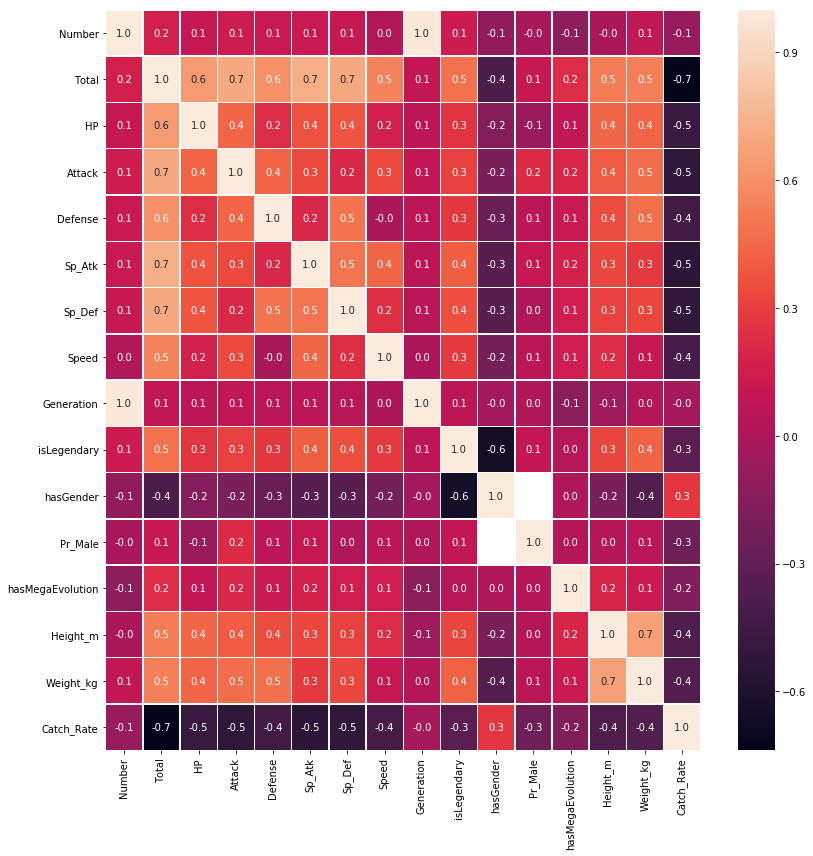

In [9]:
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(dataset.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [4]:
dataset.Type_1.unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [5]:
dataset.Type_2.unique()

array(['Poison', nan, 'Flying', 'Ground', 'Fairy', 'Grass', 'Fighting',
       'Psychic', 'Steel', 'Ice', 'Rock', 'Water', 'Electric', 'Fire',
       'Dragon', 'Dark', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [6]:
dataset.Color.unique()

array(['Green', 'Red', 'Blue', 'White', 'Brown', 'Yellow', 'Purple',
       'Pink', 'Grey', 'Black'], dtype=object)

In [7]:
dataset.Body_Style.unique()

array(['quadruped', 'bipedal_tailed', 'insectoid', 'serpentine_body',
       'four_wings', 'two_wings', 'bipedal_tailless', 'head_legs',
       'head_base', 'multiple_bodies', 'several_limbs', 'head_arms',
       'with_fins', 'head_only'], dtype=object)

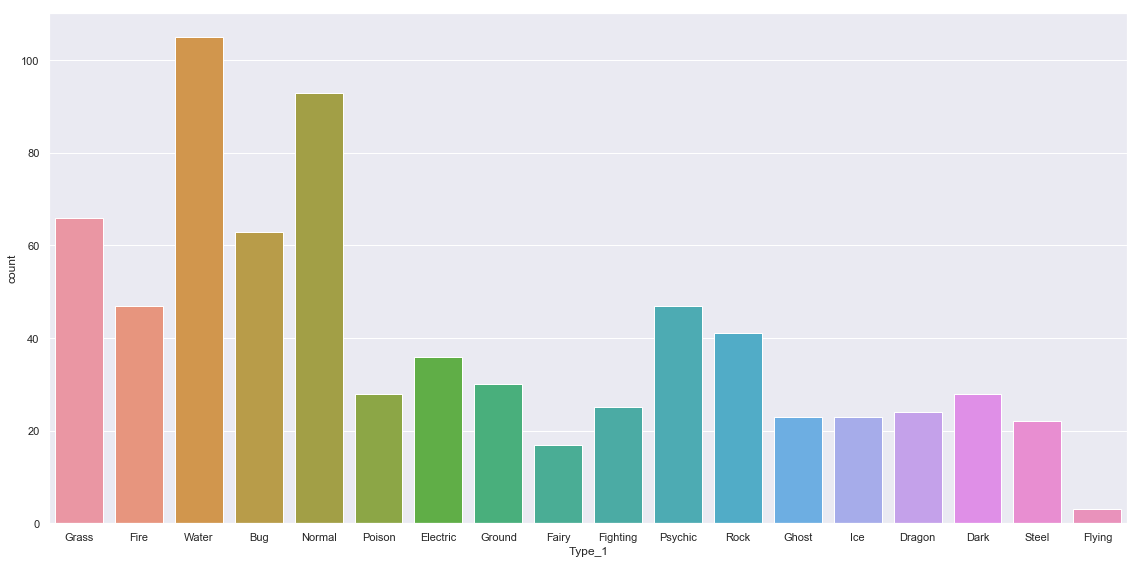

In [8]:
fig= plt.figure(figsize=(16,8))
sns.set(style="darkgrid")
ax = sns.countplot(x="Type_1", data=dataset)
plt.savefig('Type1.png')

C:\Users\Bruno\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


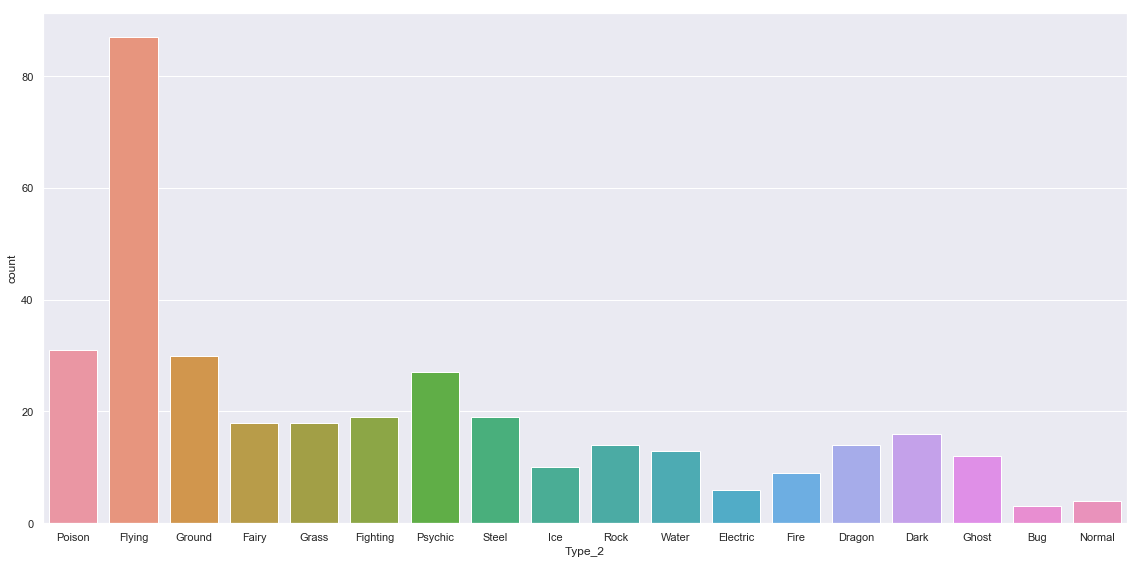

In [15]:
fig= plt.figure(figsize=(16,8))
sns.set(style="darkgrid")
ax = sns.countplot(x="Type_2", data=dataset)
plt.savefig('Type2.png')

C:\Users\Bruno\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


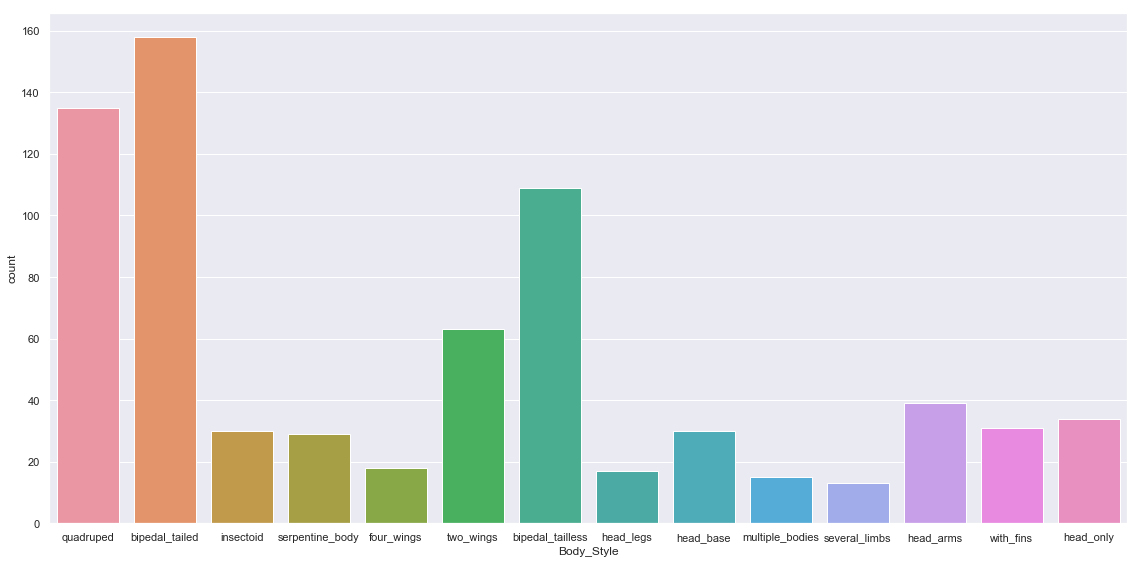

In [16]:
fig= plt.figure(figsize=(16,8))
sns.set(style="darkgrid")
ax = sns.countplot(x="Body_Style", data=dataset)
plt.savefig('Body_Style.png')

C:\Users\Bruno\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


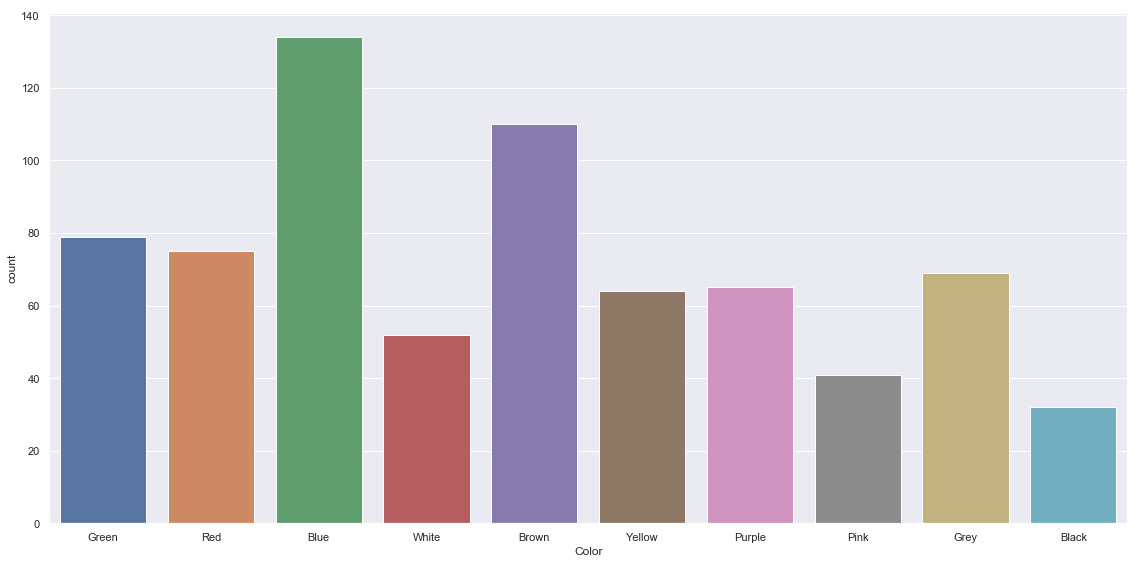

In [17]:
fig= plt.figure(figsize=(16,8))
sns.set(style="darkgrid")
ax = sns.countplot(x="Color", data=dataset)
plt.savefig('Color.png')

Todos os tipos são utilizados tanto como primários como secundários , o tipo primário predominante é o tipo água e o menos frequente é voador , já no segundo tipo voador é o mais comum e inseto o menos . 

# Problema Classificando em Lendário

In [9]:
data1 = dataset.loc[:,["Number","Total","isLegendary"]]
data1.sample(10)

,Number,Total,isLegendary
311,312,405,False
495,496,413,False
516,517,292,False
152,153,405,False
612,613,305,False
529,530,508,False
245,246,300,False
310,311,405,False
667,668,507,False
638,639,580,True


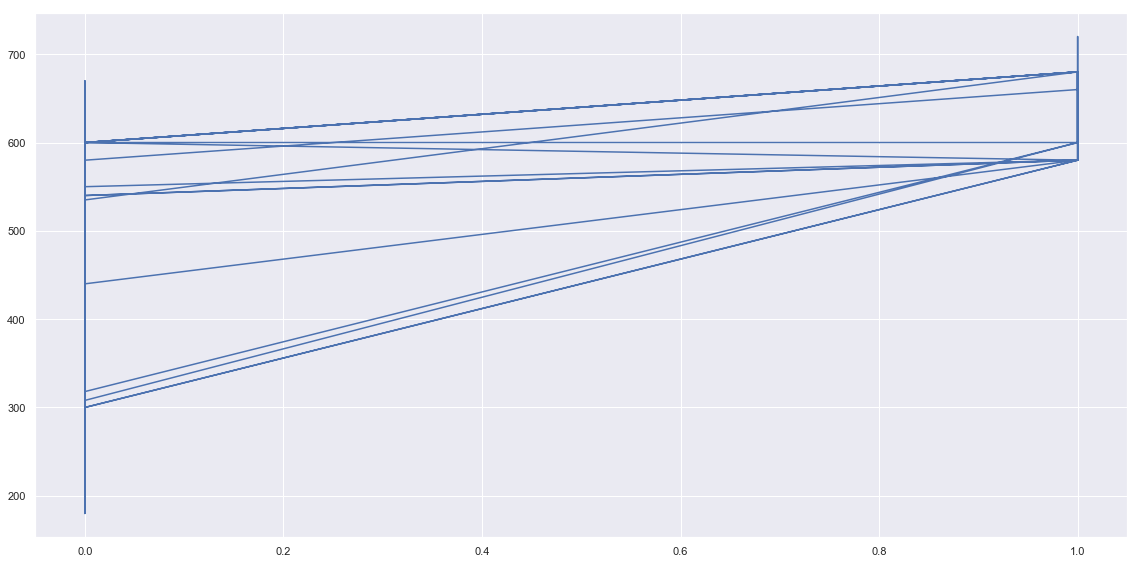

In [10]:
fig= plt.figure(figsize=(16,8))
plt.plot(data1.loc[:,'isLegendary'],data1.loc[:,'Total'])

plt.show()

Percebemos uma clara relação entre os status e verificar se um pokémon é ou não lendário, no entanto temos alguns dados que podem nos confundir 

In [12]:
#Divisão entrada e saída 

x = dataset.loc[:,["Number","HP", "Attack", "Defense",
       "Sp_Atk", "Sp_Def", "Speed"]].values

y = dataset.loc[:,"isLegendary"].values

train_ratio = 0.8
validation_ratio = 0.2

print("Número de padrões: %d" % x.shape[0])
print("Número de atributos: %d" % x.shape[1])
print("Número de classes: %d" % np.unique(y).shape[0])

Número de padrões: 721
Número de atributos: 7
Número de classes: 2


In [13]:
#Divisão treino/teste
np.random.seed(12345)

number_train = int(np.ceil(train_ratio*(x.shape[0])))
random_index = np.random.permutation(x.shape[0])
train_index = random_index[:number_train+1]
test_index = random_index[number_train+1:]

x_train = x[train_index]
x_test = x[test_index]
y_train = y[train_index]
y_test = y[test_index]

print("Número de padrões de treinamento: %d" % len(y_train))
print("Número de padrões de teste: %d" % len(y_test))

Número de padrões de treinamento: 578
Número de padrões de teste: 143


In [14]:
#divisão validação e treinamento
number_validation = int(np.ceil(validation_ratio*(x_train.shape[0])))
number_train_validation = x_train.shape[0] - number_validation

random_index = np.random.permutation(x_train.shape[0])
train_index = random_index[:number_train_validation+1]
validation_index = random_index[number_train_validation+1:number_train_validation+number_validation+1]

x_train_validation, x_validation = x_train[train_index], x_train[validation_index]
y_train_validation, y_validation = y_train[train_index], y_train[validation_index]

print("Conjunto de treinamento: %d amostras" % y_train_validation.shape[0])
print("Conjunto de validação: %d amostras" % y_validation.shape[0])

Conjunto de treinamento: 463 amostras
Conjunto de validação: 115 amostras


In [15]:
#one_hot encoding
y_train_encoding = np.zeros((y_train.shape[0], max(y)+1))
for i in range(y_train_encoding.shape[0]):
    y_train_encoding[i,y_train[i]] = 1
y_train_validation_encoding = np.zeros((y_train_validation.shape[0], max(y)+1))
for i in range(y_train_validation_encoding.shape[0]):
    y_train_validation_encoding[i,y_train_validation[i]] = 1
y_validation_encoding = np.zeros((y_validation.shape[0], max(y)+1))
for i in range(y_validation_encoding.shape[0]):
    y_validation_encoding[i,y_validation[i]] = 1
y_test_encoding = np.zeros((y_test.shape[0], max(y)+1))
for i in range(y_test_encoding.shape[0]):
    y_test_encoding[i,y_test[i]] = 1

In [16]:
x_train.shape

(578, 7)

In [17]:
y_train.shape

(578,)

In [18]:
x_validation.shape

(115, 7)

In [19]:
y_validation.shape

(115,)

In [20]:
print("[LogisticRegression] Selecionando modelos...")

num_epochs = 2000
grid_search = np.logspace(-6, 0, 25) # alpha
validation_list = []
for i in range(grid_search.shape[0]):
    alpha = grid_search[i]
    
    model_logreg = logreg.gd(x=x_train_validation, y=y_train_validation_encoding,
                              alpha=alpha, num_epochs=num_epochs, compute_loss=False)
    #print(x_validation.shape)
    pred = np.argmax(logreg.predict(model_logreg['w'], x_validation), axis=1)
    wrong_index_validation = y_validation != pred
    validation_list.append(np.mean(wrong_index_validation))
   
best_alpha = grid_search[np.argmin(validation_list)] 

print("[LogisticRegression] Melhor modelo encontrado: alpha=%.2e" % (best_alpha))

[LogisticRegression] Selecionando modelos...
[LogisticRegression] Melhor modelo encontrado: alpha=1.00e-06


[LogisticRegression] Treinando modelo...


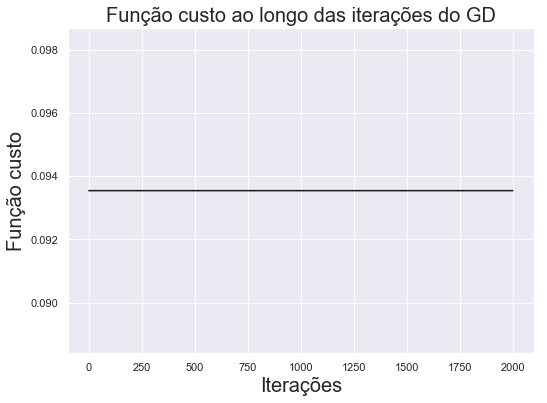

[LogisticRegression] Avaliando modelo...
[LogisticRegression] Taxa de erro no teste: 4.90%


In [21]:
print("[LogisticRegression] Treinando modelo...")
model_logreg = logreg.gd(x=x_train, y=y_train_encoding, alpha=best_alpha, num_epochs=num_epochs, compute_loss=True)

com.plot_loss_path(model_logreg['loss_history'], 'Função custo ao longo das iterações do GD')

print("[LogisticRegression] Avaliando modelo...")
pred_logreg = np.argmax(logreg.predict(model_logreg['w'], x_test), axis=1)

wrong_index_test_logreg = pred_logreg != y_test
print("[LogisticRegression] Taxa de erro no teste: %.2f%%" % (100*np.mean(wrong_index_test_logreg)))

In [23]:
label_names = np.unique(dataset.isLegendary)
print(label_names)

[False  True]


Confusion matrix - Logistc Regression
[[136   0]
 [  7   0]]


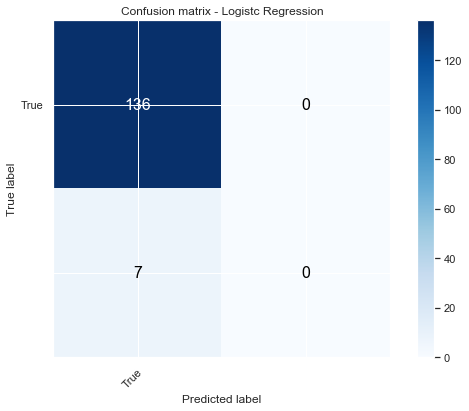

In [24]:
com.plot_confusion_matrix(y_test, y_pred=pred_logreg, classes=label_names,
                          title="Confusion matrix - Logistc Regression")
plt.show()

In [25]:
print("[KNN] Selecionando modelos...")

grid_search = np.meshgrid(np.arange(1, 26, 2), # k
                          ['euclidean', 'manhattan', 'mahalanobis']) # distance metric
validation_list = []
validation_list_index = []
for i in range(grid_search[0].shape[0]):
    for j in range(grid_search[1].shape[1]):
        k = grid_search[0][i,j]
        distance_metric = grid_search[1][i,j]   
        
        wrong_index_validation = y_validation != knn.predict_class(x=x_train_validation, y=y_train_validation,
                                                                   x_new=x_validation,
                                                                   k=k, distance_metric=distance_metric)
        validation_list.append(np.mean(wrong_index_validation))
        validation_list_index.append((i,j))
   
best_i, best_j = validation_list_index[np.argmin(validation_list)]   
best_k = grid_search[0][best_i, best_j]
best_distance_metric = grid_search[1][best_i, best_j]

print("[KNN] Melhor modelo encontrado: K=%d, 'distance_metric'=%s" % (best_k, best_distance_metric))

[KNN] Selecionando modelos...
[KNN] Melhor modelo encontrado: K=5, 'distance_metric'=euclidean


In [26]:
print("[KNN] Avaliando modelo...")
pred_knn = knn.predict_class(x_train, y_train, x_test, k=best_k, distance_metric=best_distance_metric)

wrong_index_test_knn = pred_knn != y_test
print("[KNN] Taxa de erro no teste: %.2f%%" % (100*np.mean(wrong_index_test_knn)))

[KNN] Avaliando modelo...
[KNN] Taxa de erro no teste: 2.10%


In [27]:
print("[DecisionTree] Selecionando modelos...")

grid_search = np.meshgrid(['gini', 'entropy'], # criterion
                          np.arange(2, 16, 1), # max_depth
                          np.arange(1, 21, 2)) # min_samples_leaf
validation_list = []
validation_list_index = []
for i in range(grid_search[0].shape[0]):
    for j in range(grid_search[1].shape[1]):
        for k in range(grid_search[2].shape[2]):
            criterion = grid_search[0][i,j,k]
            max_depth = grid_search[1][i,j,k]   
            min_samples_leaf = grid_search[2][i,j,k]   

            model_tree = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth,
                                                min_samples_leaf=min_samples_leaf,
                                                presort=True, random_state=1)
            model_tree.fit(x_train_validation, y_train_validation)
            
            wrong_index_validation = y_validation != model_tree.predict(x_validation)
            validation_list.append(np.mean(wrong_index_validation))
            validation_list_index.append((i,j,k))
   
best_i, best_j, best_k = validation_list_index[np.argmin(validation_list)]   
best_criterion = grid_search[0][best_i, best_j, best_k]
best_max_depth = grid_search[1][best_i, best_j, best_k]
best_min_samples_leaf = grid_search[2][best_i, best_j, best_k]

print("[DecisionTree] Melhor modelo encontrado: 'criterion'=%s, max_depth=%d, min_samples_leaf=%d" 
      % (best_criterion, best_max_depth, best_min_samples_leaf))

[DecisionTree] Selecionando modelos...
[DecisionTree] Melhor modelo encontrado: 'criterion'=entropy, max_depth=3, min_samples_leaf=1


In [28]:
print("[DecisionTree] Treinando modelo...")
model_tree = DecisionTreeClassifier(criterion=best_criterion, max_depth=best_max_depth, 
                                    min_samples_leaf=best_min_samples_leaf,
                                    presort=True, random_state=1)

model_tree.fit(x_train, y_train)

print("[DecisionTree] Avaliando modelo...")
pred_tree = model_tree.predict(x_test)

wrong_index_test_tree = pred_tree != y_test
print("[DecisionTree] Taxa de erro no teste: %.2f%%" % (100*np.mean(wrong_index_test_tree)))

[DecisionTree] Treinando modelo...
[DecisionTree] Avaliando modelo...
[DecisionTree] Taxa de erro no teste: 3.50%


Confusion matrix - KNN
[[136   0]
 [  3   4]]


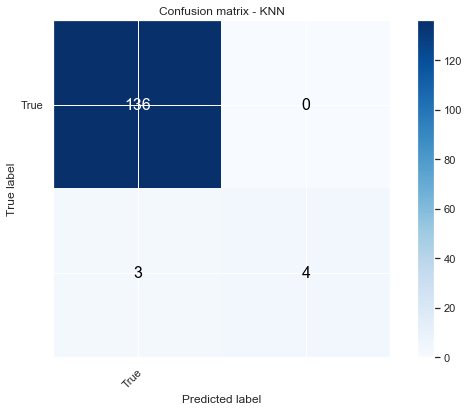

In [29]:
com.plot_confusion_matrix(y_test, y_pred=pred_knn, classes=label_names,
                          title="Confusion matrix - KNN")
plt.show()

Confusion matrix - Decision Tree
[[136   0]
 [  5   2]]


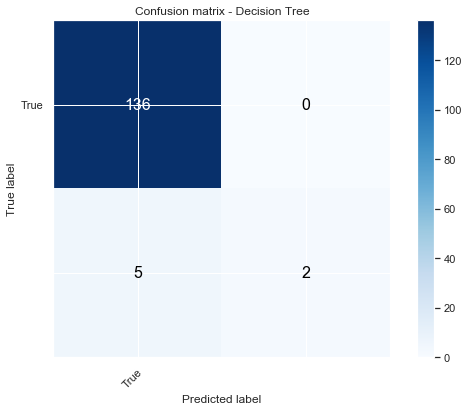

In [30]:
com.plot_confusion_matrix(y_test, y_pred=pred_tree, classes=label_names,
                          title="Confusion matrix - Decision Tree")
plt.show()

# Predição do Tipo do Pokémon baseado nas suas características

In [73]:
#One hot encoding para as entradas 
dummiesEntradas = pd.get_dummies(dataset, columns = ["Body_Style","Color"])
#dummiesEntradas = pd.get_dummies(dataset, columns = ["Body_Style","Color","Egg_Group_1"])
dummiesEntradas = dummiesEntradas.drop(["Name","Number","Type_2","Type_1","HP","Attack","Defense",
                                        "Sp_Atk","Sp_Def","Speed","Generation","isLegendary","hasGender",
                                        "Pr_Male","Egg_Group_1","Egg_Group_2","hasMegaEvolution","Height_m","Weight_kg",
                                        "Catch_Rate"],axis=1)

In [74]:
#Divisão entrada e saída 

x = dummiesEntradas.values

y_1 = dataset.loc[:,"Type_1"].values
label_names = np.unique(y_1)
y = np.zeros(y_1.shape, dtype=int)
for k, k_label in enumerate(label_names):
    y[y_1 == k_label] = k

train_ratio = 0.8
validation_ratio = 0.2

print("Número de padrões: %d" % x.shape[0])
print("Número de atributos: %d" % x.shape[1])
print("Número de classes: %d" % np.unique(y_1).shape[0])
#print(y)

Número de padrões: 721
Número de atributos: 25
Número de classes: 18


In [56]:
y.shape

(721,)

In [57]:
x.shape

(721, 39)

In [81]:
np.random.seed(456454)

number_train = int(np.ceil(train_ratio*(x.shape[0])))
random_index = np.random.permutation(x.shape[0])
train_index = random_index[:number_train+1]
test_index = random_index[number_train+1:]

x_train = x[train_index]
x_test = x[test_index]
y_train = y[train_index]
y_test = y[test_index]

print("Número de padrões de treinamento: %d" % len(y_train))
print("Número de padrões de teste: %d" % len(y_test))

Número de padrões de treinamento: 578
Número de padrões de teste: 143


In [82]:
number_validation = int(np.ceil(validation_ratio*(x_train.shape[0])))
number_train_validation = x_train.shape[0] - number_validation

random_index = np.random.permutation(x_train.shape[0])
train_index = random_index[:number_train_validation+1]
validation_index = random_index[number_train_validation+1:number_train_validation+number_validation+1]

x_train_validation, x_validation = x_train[train_index], x_train[validation_index]
y_train_validation, y_validation = y_train[train_index], y_train[validation_index]

print("Conjunto de treinamento: %d amostras" % y_train_validation.shape[0])
print("Conjunto de validação: %d amostras" % y_validation.shape[0])

Conjunto de treinamento: 463 amostras
Conjunto de validação: 115 amostras


In [83]:
#One Hot Encoding da saída
y_train_encoding = np.zeros((y_train.shape[0], max(y)+1))
for i in range(y_train_encoding.shape[0]):
    y_train_encoding[i,y_train[i]] = 1
y_train_validation_encoding = np.zeros((y_train_validation.shape[0], max(y)+1))
for i in range(y_train_validation_encoding.shape[0]):
    y_train_validation_encoding[i,y_train_validation[i]] = 1
y_validation_encoding = np.zeros((y_validation.shape[0], max(y)+1))
for i in range(y_validation_encoding.shape[0]):
    y_validation_encoding[i,y_validation[i]] = 1
y_test_encoding = np.zeros((y_test.shape[0], max(y)+1))
for i in range(y_test_encoding.shape[0]):
    y_test_encoding[i,y_test[i]] = 1

In [61]:
y_train_encoding

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [84]:
print("[DecisionTree] Selecionando modelos...")

grid_search = np.meshgrid(['gini', 'entropy'], # criterion
                          np.arange(2, 16, 1), # max_depth
                          np.arange(1, 21, 2)) # min_samples_leaf
validation_list = []
validation_list_index = []
for i in range(grid_search[0].shape[0]):
    for j in range(grid_search[1].shape[1]):
        for k in range(grid_search[2].shape[2]):
            criterion = grid_search[0][i,j,k]
            max_depth = grid_search[1][i,j,k]   
            min_samples_leaf = grid_search[2][i,j,k]   

            model_tree = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth,
                                                min_samples_leaf=min_samples_leaf,
                                                presort=True, random_state=1)
            model_tree.fit(x_train_validation, y_train_validation)
            
            wrong_index_validation = y_validation != model_tree.predict(x_validation)
            validation_list.append(np.mean(wrong_index_validation))
            validation_list_index.append((i,j,k))
   
best_i, best_j, best_k = validation_list_index[np.argmin(validation_list)]   
best_criterion = grid_search[0][best_i, best_j, best_k]
best_max_depth = grid_search[1][best_i, best_j, best_k]
best_min_samples_leaf = grid_search[2][best_i, best_j, best_k]

print("[DecisionTree] Melhor modelo encontrado: 'criterion'=%s, max_depth=%d, min_samples_leaf=%d" 
      % (best_criterion, best_max_depth, best_min_samples_leaf))

[DecisionTree] Selecionando modelos...
[DecisionTree] Melhor modelo encontrado: 'criterion'=gini, max_depth=9, min_samples_leaf=1


In [85]:
print("[DecisionTree] Treinando modelo...")
model_tree = DecisionTreeClassifier(criterion=best_criterion, max_depth=best_max_depth, 
                                    min_samples_leaf=best_min_samples_leaf,
                                    presort=True, random_state=1)

model_tree.fit(x_train, y_train)

print("[DecisionTree] Avaliando modelo...")
pred_tree = model_tree.predict(x_test)

wrong_index_test_tree = pred_tree != y_test
print("[DecisionTree] Taxa de erro no teste: %.2f%%" % (100*np.mean(wrong_index_test_tree)))

[DecisionTree] Treinando modelo...
[DecisionTree] Avaliando modelo...
[DecisionTree] Taxa de erro no teste: 66.43%


Confusion matrix - Decision Tree
[[ 6  0  0  0  0  0  0  0  0  0  0  0  1  1  1  0  0]
 [ 1  2  0  0  0  0  0  1  0  0  0  2  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  1  1  0  2  0  0  0  0  0]
 [ 1  0  0  1  0  0  0  0  0  0  0  3  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  1  0  1  1  0  0]
 [ 0  1  0  0  0  0  7  0  0  0  0  6  0  0  0  0  0]
 [ 1  2  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [ 2  0  0  0  0  0  1  0  7  0  0  3  0  1  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  1  0  0  0  0  1]
 [ 1  1  0  0  0  0  0  1  0  0  0  7  0  1  1  0  3]
 [ 3  0  0  1  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0  3  1  1  0  0  0]
 [ 3  0  0  0  0  0  1  0  1  0  0  2  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  2  0  0  0  0  0  1  0  0  0]
 [ 5  0  1  0  0  0  1  0  1  0  0  2  0  1  0  0 11]]


<Figure size 1152x576 with 0 Axes>

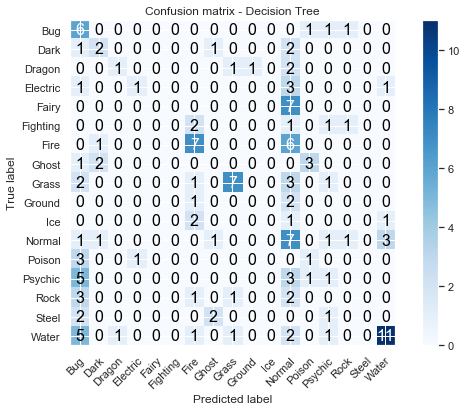

In [80]:
fig= plt.figure(figsize=(16,8))
com.plot_confusion_matrix(y_test, y_pred=pred_tree, classes=label_names,
                          title="Confusion matrix - Decision Tree")
plt.show()

In [86]:
print("[KNN] Selecionando modelos...")

grid_search = np.meshgrid(np.arange(1, 26, 2), # k
                          ['euclidean', 'manhattan', 'mahalanobis']) # distance metric
validation_list = []
validation_list_index = []
for i in range(grid_search[0].shape[0]):
    for j in range(grid_search[1].shape[1]):
        k = grid_search[0][i,j]
        distance_metric = grid_search[1][i,j]   
        
        wrong_index_validation = y_validation != knn.predict_class(x=x_train_validation, y=y_train_validation,
                                                                   x_new=x_validation,
                                                                   k=k, distance_metric=distance_metric)
        validation_list.append(np.mean(wrong_index_validation))
        validation_list_index.append((i,j))
   
best_i, best_j = validation_list_index[np.argmin(validation_list)]   
best_k = grid_search[0][best_i, best_j]
best_distance_metric = grid_search[1][best_i, best_j]

print("[KNN] Melhor modelo encontrado: K=%d, 'distance_metric'=%s" % (best_k, best_distance_metric))

[KNN] Selecionando modelos...
[KNN] Melhor modelo encontrado: K=11, 'distance_metric'=mahalanobis


In [87]:
print("[KNN] Avaliando modelo...")
pred_knn = knn.predict_class(x_train, y_train, x_test, k=best_k, distance_metric=best_distance_metric)

wrong_index_test_knn = pred_knn != y_test
print("[KNN] Taxa de erro no teste: %.2f%%" % (100*np.mean(wrong_index_test_knn)))

[KNN] Avaliando modelo...
[KNN] Taxa de erro no teste: 59.44%


Confusion matrix - KNN
[[ 9  0  0  1  0  0  0  0  1  0  0  0  0  0  1  0  1]
 [ 0  1  0  0  0  0  1  0  0  0  0  2  1  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  1  0  0  0  0  0  0  0  1]
 [ 0  0  0  3  0  0  2  2  1  0  0  0  0  1  0  1  1]
 [ 0  0  0  0  1  0  0  0  1  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  1  0  0  1  0  0  0  0  0]
 [ 0  0  1  0  0  0  5  0  0  0  0  2  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  3  0  0  0  0  0  0  0  0  1]
 [ 1  0  0  0  0  0  0  0  8  0  0  1  0  0  2  2  0]
 [ 0  0  0  0  0  0  1  0  2  1  0  1  0  1  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  3]
 [ 0  1  0  0  1  0  4  0  1  3  0 13  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  1]
 [ 1  0  0  1  1  0  0  1  1  0  0  3  0  0  1  0  0]
 [ 0  1  0  0  0  0  1  1  0  0  0  1  0  0  0  1  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  1  0  0  0  1  3]
 [ 0  1  2  1  0  0  0  0  0  0  0  1  0  1  0  0 12]]


<Figure size 1152x576 with 0 Axes>

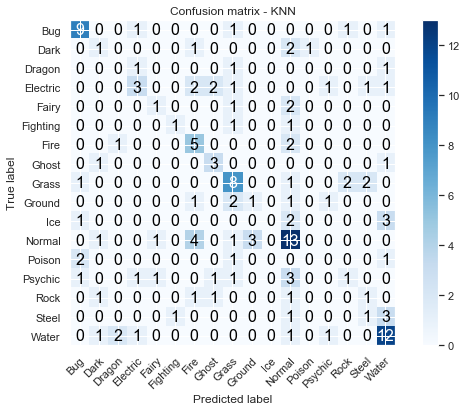

In [88]:
fig= plt.figure(figsize=(16,8))
com.plot_confusion_matrix(y_test, y_pred=pred_knn, classes=label_names,
                          title="Confusion matrix - KNN")
plt.show()

In [89]:
print("[GaussianDiscriminantAnalysis] Treinando modelo...")
model_gda = stat.create_GDA(x=x_train, y=y_train)

print("[GaussianDiscriminantAnalysis] Avaliando modelo...")
pred_gda = stat.predict_GDA(model=model_gda, x=x_test)

wrong_index_test_gda = pred_gda != y_test
print("[GaussianDiscriminantAnalysis] Taxa de erro no teste: %.2f%%" % (100*np.mean(wrong_index_test_gda)))

[GaussianDiscriminantAnalysis] Treinando modelo...
[GaussianDiscriminantAnalysis] Avaliando modelo...
[GaussianDiscriminantAnalysis] Taxa de erro no teste: 74.13%


Confusion matrix - Guassian Discriminant
[[ 7  0  0  1  0  2  1  1  0  0  0  0  0  0  1  0  0]
 [ 0  1  0  1  0  0  1  1  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  1  4  0  1  0  1  0  0  0  0  2  0]
 [ 0  0  0  0  3  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  7  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  4  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  1  0  1  0  0  7  0  0  1  1  0  2  0  0]
 [ 0  0  0  0  0  1  2  1  1  0  0  0  1  0  0  0  0]
 [ 0  0  0  1  1  0  0  2  0  0  1  0  0  0  0  1  0]
 [ 0  5  0  0  1  4 10  1  1  0  0  0  0  0  0  1  0]
 [ 1  0  0  0  0  1  0  0  1  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  1  6  0  1  1  0  0  0  0  0  0  0  0]
 [ 0  1  0  1  0  0  1  1  0  0  0  0  0  0  0  1  0]
 [ 0  2  0  0  0  1  0  2  0  0  0  0  0  0  0  1  0]
 [ 0  0  2  1  1  8  0  1  0  0  4  0  0  0  0  0  1]]


<Figure size 1152x576 with 0 Axes>

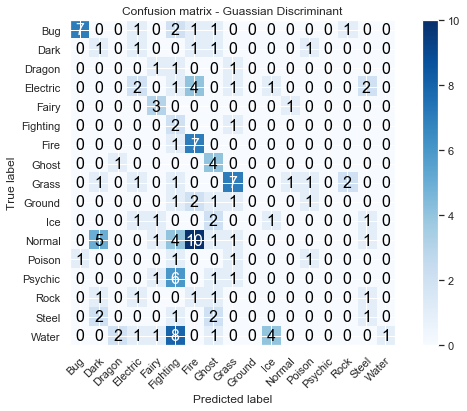

In [90]:
fig= plt.figure(figsize=(16,8))
com.plot_confusion_matrix(y_test, y_pred=pred_gda, classes=label_names,
                          title="Confusion matrix - Guassian Discriminant")
plt.show()

In [91]:
print("[LogisticRegression] Selecionando modelos...")

num_epochs = 1000
grid_search = np.logspace(-3, 0, 25) # alpha
validation_list = []
for i in range(grid_search.shape[0]):
    alpha = grid_search[i]
    
    model_logreg = logreg.gd(x=x_train_validation, y=y_train_validation_encoding,
                              alpha=alpha, num_epochs=num_epochs, compute_loss=False)
    pred = np.argmax(logreg.predict(model_logreg['w'], x_validation), axis=1)
    wrong_index_validation = y_validation != pred
    validation_list.append(np.mean(wrong_index_validation))
   
best_alpha = grid_search[np.argmin(validation_list)] 

print("[LogisticRegression] Melhor modelo encontrado: alpha=%.2e" % (best_alpha))

[LogisticRegression] Selecionando modelos...
[LogisticRegression] Melhor modelo encontrado: alpha=2.37e-03


[LogisticRegression] Treinando modelo...


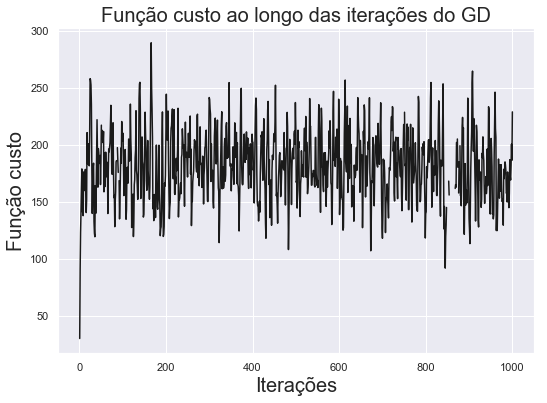

[LogisticRegression] Avaliando modelo...
[LogisticRegression] Taxa de erro no teste: 90.21%


In [92]:
print("[LogisticRegression] Treinando modelo...")
model_logreg = logreg.gd(x=x_train, y=y_train_encoding, alpha=best_alpha, num_epochs=num_epochs, compute_loss=True)

com.plot_loss_path(model_logreg['loss_history'], 'Função custo ao longo das iterações do GD')

print("[LogisticRegression] Avaliando modelo...")
pred_logreg = np.argmax(logreg.predict(model_logreg['w'], x_test), axis=1)

wrong_index_test_logreg = pred_logreg != y_test
print("[LogisticRegression] Taxa de erro no teste: %.2f%%" % (100*np.mean(wrong_index_test_logreg)))

Confusion matrix - Logistic Regression
[[ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0]]


<Figure size 1152x576 with 0 Axes>

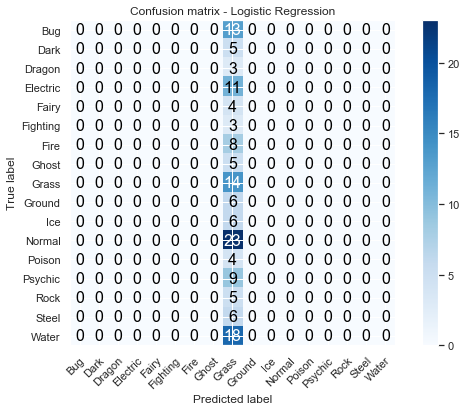

In [93]:
fig= plt.figure(figsize=(16,8))
com.plot_confusion_matrix(y_test, y_pred=pred_logreg, classes=label_names,
                          title="Confusion matrix - Logistic Regression")
plt.show()

In [94]:
print("[GaussianNaiveBayes] Treinando modelo...")
model_gnb = stat.create_GNB(x=x_train, y=y_train)

print("[GaussianNaiveBayes] Avaliando modelo...")
pred_gnb = stat.predict_GNB(model=model_gnb, x=x_test)

wrong_index_test_gnb = pred_gnb != y_test
print("[GaussianNaiveBayes] Taxa de erro no teste: %.2f%%" % (100*np.mean(wrong_index_test_gnb)))

[GaussianNaiveBayes] Treinando modelo...
[GaussianNaiveBayes] Avaliando modelo...
[GaussianNaiveBayes] Taxa de erro no teste: 74.83%


Confusion matrix - Guassian Naive Bayes
[[ 8  0  0  0  0  2  1  0  1  0  0  0  0  0  0  0  1  0]
 [ 0  1  0  0  2  0  1  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  5  0  0  1  0  3  0  0  0  0  1  0]
 [ 0  0  0  0  3  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  7  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  1  3  0  0  0  0  0  0  0  0  0]
 [ 0  1  1  0  0  1  0  0  0  7  0  0  1  0  0  2  1  0]
 [ 0  0  0  0  0  1  2  0  1  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  2  0  0  1  0  0  0  0  1  0]
 [ 0  6  1  0  3  2 10  0  1  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  1  0  0  0  1  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  3  4  0  0  1  1  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  1  0  1  0  0  2  0  0  0  0  0  0]
 [ 0  1  0  0  0  1  0  0  2  0  0  0  0  1  0  

<Figure size 1152x576 with 0 Axes>

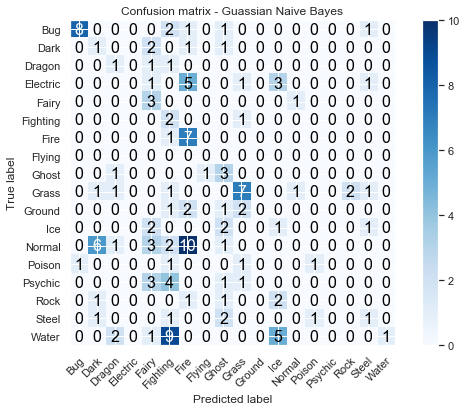

In [95]:
fig= plt.figure(figsize=(16,8))
com.plot_confusion_matrix(y_test, y_pred=pred_gnb, classes=label_names,
                          title="Confusion matrix - Guassian Naive Bayes")
plt.show()

Os tipos  melhores preditos em geral são o Inseto, Água e Normal, sem utilizar o Egg_Group
Utilizando o Atributo Egg_group_1 acertamos mais de certos tipos (Fogo e Grama ), no entando a acurácia do modelo diminui